In [10]:
import pandas as pd
#from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
df=pd.read_csv("/content/drive/MyDrive/tallerpython_ML/DatosAzcapo.txt",sep=',',header=None)

In [11]:
df['fechas']=pd.to_datetime(df[0])
df=df.set_index('fechas')

<ipython-input-11-f5f18913dd5c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fechas']=pd.to_datetime(df[0])


In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
fechas,,,,,,,,,,,,,
2024-04-04 00:00:00,4/4/2024 12:00:00 AM,4/4/2024 6:00:00 AM,28.692070,14.742066,13.950004,23.128830,19.350910,77.827011,28.035599,25.874756,33.960640,11.665325,5.025064
2024-04-04 00:01:00,4/4/2024 12:01:00 AM,4/4/2024 6:01:00 AM,32.022658,14.771019,17.251640,23.148970,19.340763,77.817986,27.919699,25.910034,33.966431,11.671605,5.068029
2024-04-04 00:02:00,4/4/2024 12:02:00 AM,4/4/2024 6:02:00 AM,32.219123,14.717249,17.501873,23.169109,19.335342,77.820869,27.938000,25.910950,33.988586,11.663702,5.003208
2024-04-04 00:03:00,4/4/2024 12:03:00 AM,4/4/2024 6:03:00 AM,31.586301,14.659344,16.926957,23.169109,19.330561,77.814812,27.956299,25.925995,33.997185,11.670901,4.931069
2024-04-04 00:04:00,4/4/2024 12:04:00 AM,4/4/2024 6:04:00 AM,32.534500,14.676922,17.857577,23.199320,19.308531,77.830132,27.956299,25.948059,34.013283,11.678738,5.000206


In [12]:
PM10= df[2]
PM25=df[3]
PMmix=df[4]
temp=df[6]
Pres=df[7]
RH=df[8]

In [13]:
variable=['$PM_{10}$', '$PM_{2.5}$', '$PM_{mix}$','f','P','RH',]
colors= ['black','red','blue','green','orange','brown']

In [14]:
def plot_var(var, index,lim_min,lim_max):
  plt.figure(figsize=(15,2))
  plt.plot(var.iloc[lim_min:lim_max],color=colors[index],label=variable[index])
  plt.xlabel('Tiempo',fontsize=12)
  plt.ylabel(f'{variable[index]}', fontsize=12)
  plt.legend()
  plt.grid(True)
  plt.show()

52179


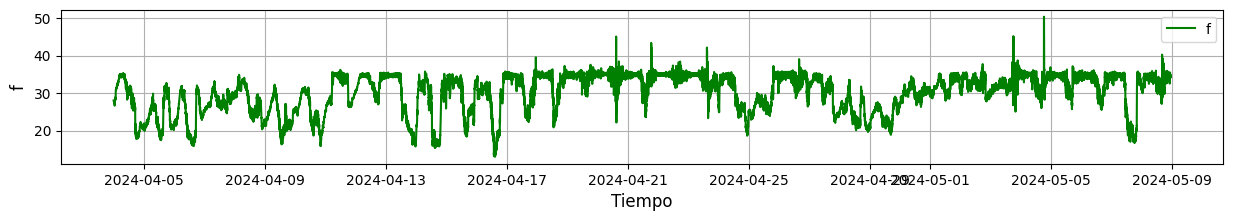

In [22]:
print(len(df))
index=3
plot_var(RH,index,0,50000)

In [5]:
df.skew(numeric_only=True) #VALORES NUMERICOS

,0
2,2.627921
3,0.689481
4,3.799422
5,1.763857
6,0.178861
7,0.272153
8,-0.895409
9,0.437827
10,1.702012
11,0.561093


<Axes: xlabel='2', ylabel='Count'>

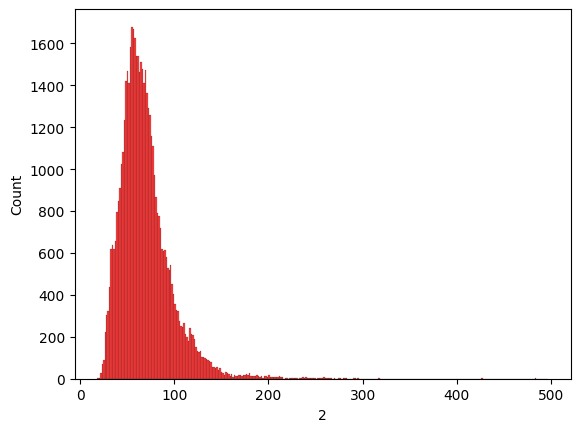

In [25]:
sns.histplot(PM10,color='red'
             )

In [17]:
df.kurt(numeric_only=True)

,0
2,17.602749
3,0.728258
4,28.249759
5,2.810165
6,-0.996193
7,-0.165019
8,-0.111215
9,6.155148
10,2.888641
11,46.158682


In [18]:
#calcular la correlacion

correlation0 = df[3].corr(df[2],method='spearman')
correlation1 = df[3].corr(df[4],method='spearman')
correlation2 = df[3].corr(df[6],method='spearman')
correlation3 = df[3].corr(df[7],method='spearman')
correlation4 = df[3].corr(df[8],method='spearman')

print(f"Correlacion PM2.5 Y PM10: {correlation0}")
print(f"Correlacion PM2.5 Y PMmix: {correlation1}")
print(f"Correlacion PM2.5 Y Temp: {correlation2}")
print(f"Correlacion PM2.5 Y Press: {correlation3}")
print(f"Correlacion PM2.5 Y RH: {correlation4}")

Correlacion PM2.5 Y PM10: 0.6628288269857316
Correlacion PM2.5 Y PMmix: 0.19378730709920722
Correlacion PM2.5 Y Temp: 0.03153504569097056
Correlacion PM2.5 Y Press: 0.005900923429563776
Correlacion PM2.5 Y RH: 0.415282630428508


In [28]:
print(temp)

fechas
2024-04-04 00:00:00    19.350910
2024-04-04 00:01:00    19.340763
2024-04-04 00:02:00    19.335342
2024-04-04 00:03:00    19.330561
2024-04-04 00:04:00    19.308531
                         ...    
2024-05-10 11:00:00    27.933237
2024-05-10 11:01:00    27.841600
2024-05-10 11:02:00    27.891018
2024-05-10 11:03:00    27.694765
2024-05-10 11:04:00    27.570236
Name: 6, Length: 52179, dtype: float64


In [ ]:
##Date & Time (Local), Date & Time (UTC), PM10 Conc, PM25 Conc, PM10-25 Conc, Sample Temp, Ambient Temp, Ambient Pressure, Sample RH, Box Temp, LED Temp, Bypass Flow, Sample Flow

##Date & Time (Local), Date & Time (UTC), PM10 Conc, PM25 Conc, PM10-25 Conc, Sample Temp, Ambient Temp, Ambient Pressure, Sample RH, Box Temp, LED Temp, Bypass Flow, Sample Flow

In [29]:
Data_in = np.column_stack([temp, Pres,RH])
Data_out = np.column_stack([PM25])
print(Data_in)
print(len(Data_in))

[[19.35091019 77.82701111 28.03559875]
 [19.34076309 77.81798553 27.91969872]
 [19.33534241 77.82086945 27.93799973]
 ...
 [27.89101791 78.05047607 26.26659966]
 [27.69476509 78.07154846 25.30279922]
 [27.57023621 78.05378723 24.47929955]]
52179


generacion de modelos con redes neuronales

In [30]:
Data_out.shape #numero de filas y columnas

(52179, 1)

In [31]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='linear',input_shape=(Data_in.shape[1],)),
                          tf.keras.layers.Dense(1,activation='linear')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(Data_in,Data_out, test_size=0.2,random_state=42)

In [35]:
print(Data_in[:5])
print(X_train[:5])

[[19.35091019 77.82701111 28.03559875]
 [19.34076309 77.81798553 27.91969872]
 [19.33534241 77.82086945 27.93799973]
 [19.33056068 77.81481171 27.95629883]
 [19.30853081 77.83013153 27.95629883]]
[[24.13035774 77.91934967 29.98759842]
 [16.16941452 78.06840515 21.11209869]
 [27.22885513 77.9575119  29.09699821]
 [13.59325886 78.20446777 34.78219986]
 [23.71559715 78.21208191 27.52319908]]
